In [1]:
from math import *
from matplotlib.pyplot import *
from matplotlib import animation
from IPython.display import HTML
from random import choice

In [2]:
def doubleEpicycloide(data, a=0, b=2*pi, nb_planche=100) : 
    
    #découpage temporelle
    T=[a+(b-a)*k/nb_planche for k in range(nb_planche)]
    
    #Création de la figure
    fig = figure(figsize=(7,7))
    
    #taille
    xmin=-25
    xmax=25
    
    #Bornes graphiques
    xlim((xmin, xmax))
    ylim((xmin, xmax))

    #Titre
    title("Epicycloïde a double gravitation")

    def doubleInit():
        return ()
    
    centreXx=1/2*xmax
    centreXy=1/2*xmax
    centreYx=1/2*xmin
    centreYy=1/2*xmin

    def constructionDoubleEpicycloide(i):

        centreXx=1/2*xmax
        centreXy=1/2*xmax
        centreYx=1/2*xmin
        centreYy=1/2*xmin
        
        print("\rPlanche "+str(round((i+1)/nb_planche*100, 2))+"%", end='')
        if(i==nb_planche-1) : print("\rCalculs terminés")
        n=nb_planche-1

        S=[a+(b-a)*k/n for k in range(n+1)]
        T=S[:(i+1)]

        epiXx=[centreXx for t in T]
        epiXy=[centreXy for t in T]
        epiYx=[centreYx for t in T]
        epiYy=[centreYy for t in T]

        for num_cercle in range(len(data)) :
            
            v=data[num_cercle]["V"]
            
            RX=data[num_cercle]["X"][0]
            pX=data[num_cercle]["X"][1]
            xX=RX*cos(v*T[-1]+pX)
            yX=RX*sin(v*T[-1]+pX)
            
            RY=data[num_cercle]["Y"][0]
            pY=data[num_cercle]["Y"][1]
            xY=RY*cos(v*T[-1]+pY)
            yY=RY*sin(v*T[-1]+pY)
            
            cerclesX[num_cercle].set_data([centreXx+RX*cos(v*s+pX) for s in S], [centreXy+RX*sin(v*s+pX) for s in S])
            cerclesY[num_cercle].set_data([centreYx+RY*cos(v*s+pY) for s in S], [centreYy+RY*sin(v*s+pY) for s in S])

            centreXx+=xX
            centreXy+=yX
            centreYx+=xY
            centreYy+=yY

            for k in range(i+1) : 
                epiXx[k]+=RX*cos(v*T[k]+pX)
                epiXy[k]+=RX*sin(v*T[k]+pX)
                epiYx[k]+=RY*cos(v*T[k]+pY)
                epiYy[k]+=RY*sin(v*T[k]+pY)
                

        epiX.set_data(epiXx, epiXy)
        epiY.set_data(epiYx, epiYy)
        
        axe1X.set_data([epiXx[i], epiXx[i]],[epiXy[i], xmin])
        axe1Y.set_data([epiYx[i], xmax],[epiYy[i], epiYy[i]])
        
        Dessin1.set_data(epiXx, epiYy)

        return ()

    #Initialisations
    cerclesX=[]
    cerclesY=[]
    for num_cercle in range(len(data)) :
            
        v=data[num_cercle]["V"]
            
        RX=data[num_cercle]["X"][0]
        pX=data[num_cercle]["X"][1]
        RY=data[num_cercle]["Y"][0]
        pY=data[num_cercle]["Y"][1]
        
        cercleX, =plot([], [], lw=1)
        cerclesX.append(cercleX)
        cercleY, =plot([], [], lw=1)
        cerclesY.append(cercleY)

    #epicycloïde
    epiX, =plot([], [], lw=3)
    epiY, =plot([], [], lw=3)
    
    #Axe
    axe1X, =plot([], [], 'r', lw=1)
    axe1Y, =plot([], [], 'r', lw=1)

    #Dessin
    Dessin1, =plot([], [], 'r')
    
    print("Calculs en cours")
    return animation.FuncAnimation(fig, constructionDoubleEpicycloide, init_func=doubleInit,frames=nb_planche, interval=50, blit=True)


Calculs en cours
Calculs terminés


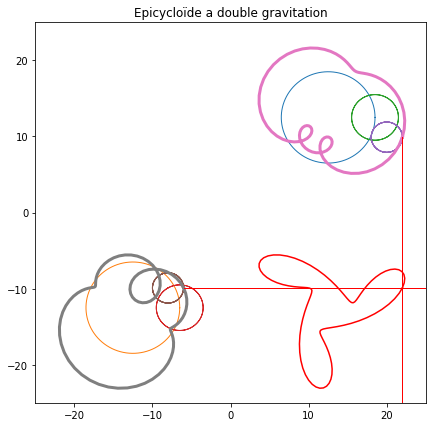

In [3]:
#V:vitesse, X:[rayonX, phaseX], Y:[rayonY, phaseY]
data=[
    {'V':1, 'X':[6,0],     'Y':[6,0]},
    {'V':2, 'X':[3,-pi/3], 'Y':[3,2*pi/3]},
    {'V':4, 'X':[2,0],     'Y':[2,0]}
]

HandSpineroide=doubleEpicycloide(data)
HTML(HandSpineroide.to_jshtml())

In [4]:
def epicycloide(data, a=0, b=2*pi, nb_planche=100) :
    
    nb_cercle=len(data)
    
    #Correctif
    for num_cercle in range(nb_cercle) : 
        try : phase=data[num_cercle]['P']
        except : data[num_cercle]['P']=0
             
        try : couleur=data[num_cercle]['C']
        except : data[num_cercle]['P']=choice(['r', 'g', 'b', 'c', 'm', 'k'])
            
    
    #Création de la figure
    fig = figure(figsize=(7,7))
    
    xmax=1
    for num_cercle in range(nb_cercle) : xmax+=abs(data[num_cercle]['R'])
    xmin=-xmax

    #Bornes graphiques
    xlim((xmin, xmax))
    ylim((xmin, xmax))
    
    #Titre
    title("Epicycloïde")

    def init():
        return ()

    def constructionEpicycloide(i):
        print("\rPlanche "+str(round((i+1)/nb_planche*100, 2))+"%", end='')
        if(i==nb_planche-1) : print("\rCalculs terminés")
        n=nb_planche-1

        centreX=0
        centreY=0

        S=[a+(b-a)*k/n for k in range(n+1)]
        T=S[:(i+1)]

        epiX=[0 for t in T]
        epiY=[0 for t in T]

        for num_cercle in range(nb_cercle) : 
            R=data[num_cercle]['R']
            v=data[num_cercle]['V']
            p=data[num_cercle]['P']
            c=data[num_cercle]['C']
                
            X=[centreX+R*cos(v*t+p)/5 for t in T]
            Y=[centreY+R*sin(v*t+p)/5 for t in T]
            x=R*cos(v*T[-1]+p)
            y=R*sin(v*T[-1]+p)
            points[num_cercle].set_data([centreX+x], [centreY+y])
            arcs[num_cercle].set_data(X, Y)
            angles[num_cercle].set_data([centreX+R*cos(v*T[0]+p), centreX, centreX+x], [centreY+R*sin(v*T[0]+p), centreY, centreY+y])
            cercles[num_cercle].set_data([centreX+R*cos(v*s+p) for s in S], [centreY+R*sin(v*s+p) for s in S])

            centreX+=x
            centreY+=y

            for k in range(i+1) : 
                epiX[k]+=R*cos(v*T[k]+p)
                epiY[k]+=R*sin(v*T[k]+p)

        epi.set_data(epiX, epiY)

        return ()

    #Initialisations
    points=[]
    arcs=[]
    angles=[]
    cercles=[]
    for num_cercle in range(nb_cercle) : 
        R=data[num_cercle]['R']
        v=data[num_cercle]['V']
        c=data[num_cercle]['C']
        p=data[num_cercle]['P']
        
        point, =plot([], [], c+'o', lw=2)
        points.append(point)

        arc, =plot([], [], c, lw=0.79)
        arcs.append(arc)

        angle, =plot([], [], c, lw=1, label="Cercle "+str(num_cercle+1)+" : $R="+str(R)+"$,\t $\\omega="+str(v)+"$,\t $\\varphi="+str(round(p, 2))+"$")
        angles.append(angle)

        cercle, =plot([], [], c, lw=1)
        cercles.append(cercle)

    #epicycloïde
    c=data[-1]['C']
    epi, =plot([], [], c, lw=3)

    #Affichage des label
    legend(loc="upper left", bbox_to_anchor=(0, 0))

    print("Calculs en cours")
    return animation.FuncAnimation(fig, constructionEpicycloide, init_func=init,frames=nb_planche, interval=50, blit=True)


Calculs en cours
Calculs terminés


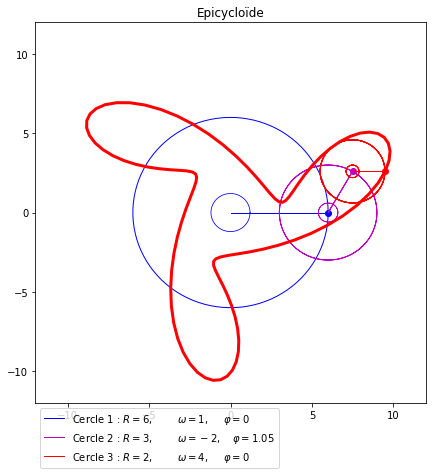

In [5]:
#V= vitesse, R=rayon, P=phase, C=couleur (optionelle)
data=[
    {'V':1,  'R':6, 'P':0,    'C':'b'},
    {'V':-2, 'R':3, 'P':pi/3, 'C':'m'},
    {'V':4,  'R':2, 'P':0,    'C':'r'},
]
HandSpineroide=epicycloide(data)
HTML(HandSpineroide.to_jshtml())